Group Member Name(Master data science): Suresh Kumar Choudhary, Sofya Laskina, Emilio Kuhlmann 

Import necessary packages: Numpy, Pandas, matplotlib

In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

Mount your google drive (if you have a google account) or upload files (go on the file icon on the left -> right click). Copy path of zip.train and zip.test and load them as numpy arrays using the following code (insert the path as string).

In [60]:
path_to_train = './zip.train'
path_to_test = './zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

# We only want to classify two different digits. You can choose which digits you want to classify youself

X_train = X_train[np.logical_or(y_train == 1, y_train == 9)]
X_test = X_test[np.logical_or(y_test == 1, y_test == 9)]
y_train = y_train[np.logical_or(y_train == 1, y_train == 9)].reshape(-1,1)
y_train=np.where(y_train> 5, 1, 0)
#print(y_train)
y_test = y_test[np.logical_or(y_test == 1, y_test == 9)].reshape(-1,1)
y_test=np.where(y_test> 5, 1, 0)

In [61]:
def show_numbers(X):
    num_samples = 90
    indices = np.random.choice(range(len(X)), num_samples)
    print(indices.shape)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1)
        img = 1-sample_digits[i].reshape((16, 16)) 
        plt.imshow(img, cmap='gray')
        plt.axis('off')


(90,)


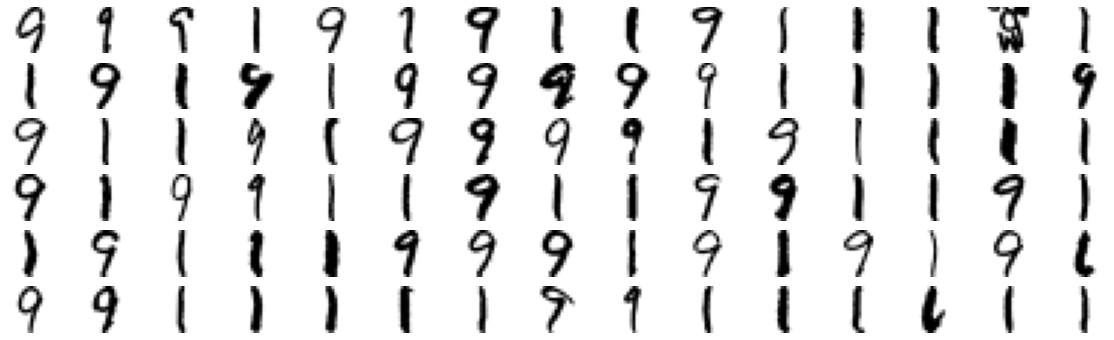

In [62]:
show_numbers(X_test)

Implement Logistic Regression, do gradient descent until training converges (find a good criterion for when that is the case yourself) and test the accuracy on your test data.

In [79]:
class LogisticRegression:
  def __init__(self, w, b):
    self.w = w
    self.b = b
    
  def mean_squared_error(self,x,y):
    mse=1/y.shape[0]*np.sum((y-self.sigmoid_function(x))**2)
    return mse
  
    
  def sigmoid_function(self,x):
    return 1 / (1 + np.exp(-(np.dot(x,self.w) +self.b)))
    
  def cross_entropy_loss(self, x,y):
    sigmoid = self.sigmoid_function(x)
    CE = -1/x.shape[0]*np.sum(np.multiply(y, np.log(sigmoid))+ np.multiply((1-y),np.log(1-sigmoid)))
    return CE

  def gradient_descent(self, x,y):
    dw = 1/x.shape[0] * np.dot(x.T, (self.sigmoid_function(x)  - y))         
    db = 1/x.shape[0] * np.sum(self.sigmoid_function(x)  - y)
    return  (dw,db)
    
  def fit(self,x,y, learning_rate,num_iter):
    counter = 0
    loss = [self.cross_entropy_loss(x,y)]
    loss_difference = 1
    while loss_difference > 0.001 and counter < num_iter:
      gradient_updated = self.gradient_descent(x,y)
      #print(gradient_updated[0][:10])
      #print(gradient_updated[0].shape[0],self.w.shape[0])
      w_updates = self.w - learning_rate*gradient_updated[0]
      b_updates = self.b - learning_rate*gradient_updated[1]
      self.w = w_updates
      self.b = b_updates
      loss.append(self.cross_entropy_loss(x,y))
      #print(current_loss)
      loss_difference = abs(loss[-2]-loss[-1])

      counter+=1
    self.plot_loss(loss,np.arange(0,counter+1,1),learning_rate)
    return LogisticRegression(self.w,self.b)

 #gradient for mean squared error model
  def greadient_meansquared(self,x,y):
    dw = 1/x.shape[0] *np.dot(x.T,self.sigmoid_function(x)*(1-self.sigmoid_function(x).T)*(self.sigmoid_function(x)  - y))         
    db = 1/x.shape[0] * np.sum(self.sigmoid_function(x)  - y)
    return  (dw,db)

  #means quared error model fit function
  def fit_mse(self,x,y, learning_rate,num_iter):
    counter = 0
    error = [self.mean_squared_error(x,y)]
    error_difference = 1
    while error_difference > 0.001 and counter < num_iter:
      gradient_updated = self.greadient_meansquared(x,y)
      #print(gradient_updated[0][:10])\
      print('gradient shape',gradient_updated[0].shape[0],'weight shape',self.w.shape[0])
      w_updates = self.w - learning_rate*gradient_updated[0]
      b_updates = self.b - learning_rate*gradient_updated[1]
      self.w = w_updates
      self.b = b_updates
      error.append(self.mean_squared_error(x,y))
      #print(current_loss)
      error_difference = abs(error[-2]-error[-1])

      counter+=1
    self.plot_mse(error,np.arange(0,counter+1,1),learning_rate)
    return LogisticRegression(self.w,self.b)

  def predict(self,x):
    y = self.sigmoid_function(x)
    return y
  def plot_loss(self,loss,num_iter,learning_rate):
        #print(loss)
        #print(num_iter)
        plt.plot(num_iter,loss)
        plt.title('Learning rate=%f'%learning_rate)
        plt.xlabel('Number of iterations')
        plt.ylabel('loss')
        plt.show()
  def plot_mse(self,loss,num_iter,learning_rate):
        #print(loss)
        #print(num_iter)
        plt.plot(num_iter,loss)
        plt.title('Learning rate=%f, Mean Squared Error vs Iterations '%learning_rate)
        plt.xlabel('Number of iterations')
        plt.ylabel('Mean Squared Error')
        plt.show()

In [64]:
def weight_initiliazitation(x):
    w = np.zeros((x.shape[1], 1))
    b = 0
    return (w,b)

def find_optimum_lr(lr_list,X_train,y_train,X_test,y_test,w,b):
    lr_acc=[]
    for lr in lr_list:
        model = LogisticRegression(w,b)
        model.fit(X_train,y_train,lr,num_iter)
        predictions = model.predict(X_test)
        y_pred_binary = np.where(predictions > 0.5, 1, 0)
        #we are using f-score as no of digits are not balanced
        accuracy_score=f1_score(y_test,y_pred_binary)
        lr_acc.append([accuracy_score,lr])
    x=[str(x[1]) for x in lr_acc]
    y=[x[0] for x in lr_acc]
    plt.plot(x,y)
    plt.xlabel('learning rate')
    plt.ylabel('Accuracy score(F-score)')
    plt.show()
    lr_acc.sort(reverse=True)
    return lr_acc[0][1]


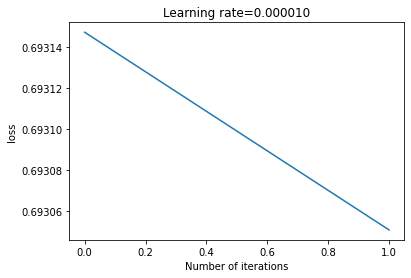

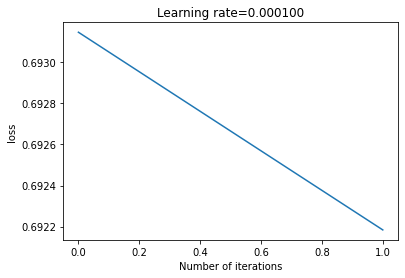

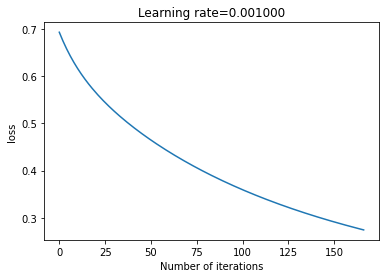

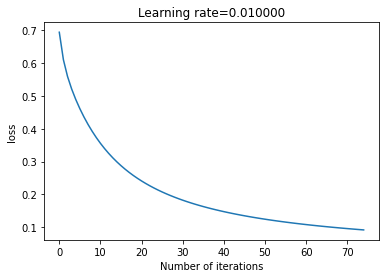

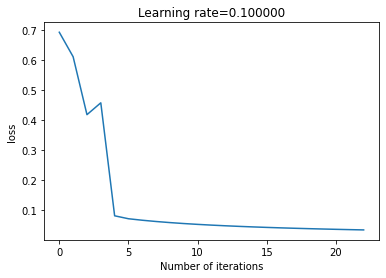

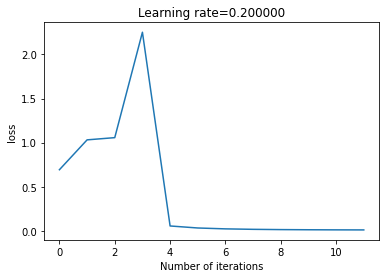

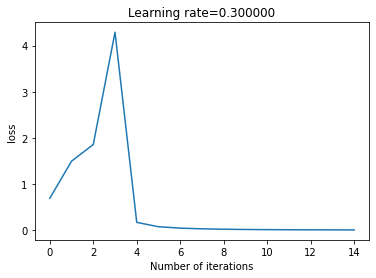

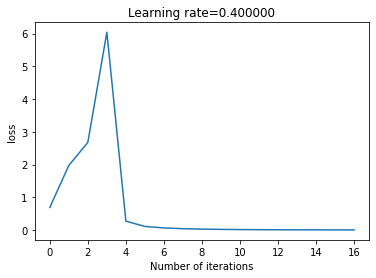

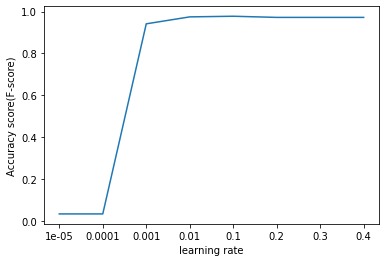

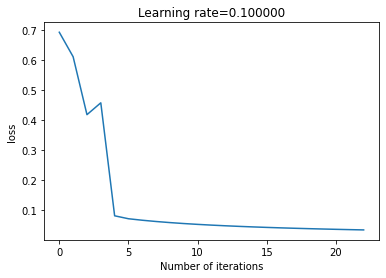

In [65]:
num_iter=500
w,b=weight_initiliazitation(X_train)
lr_list=[0.00001,0.0001,0.001,0.01,0.1,0.2,0.3,0.4]
optimum_learning_rate=find_optimum_lr(lr_list,X_train,y_train,X_test,y_test,w,b)
model = LogisticRegression(w,b).fit(X_train,y_train,optimum_learning_rate,num_iter)


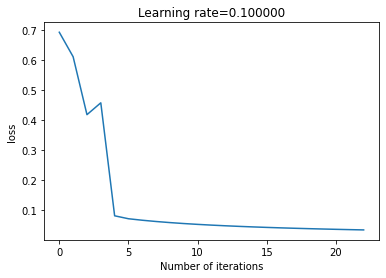

In [66]:
model = LogisticRegression(w,b).fit(X_train,y_train,optimum_learning_rate,num_iter)

In [67]:
predictions = model.predict(X_test)
y_pred_binary = np.where(predictions > 0.5, 1, 0)
accuracy_score=f1_score(y_test,y_pred_binary)
print('accuracy score(F-score)%.2f'%accuracy_score)


accuracy score(F-score)0.98


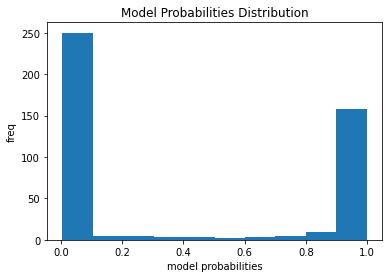

              precision    recall  f1-score   support

     digit 1       0.98      0.98      0.98       264
     digit 9       0.98      0.98      0.98       177

    accuracy                           0.98       441
   macro avg       0.98      0.98      0.98       441
weighted avg       0.98      0.98      0.98       441



In [68]:
plt.hist(predictions, bins = 10)
plt.title('Model Probabilities Distribution')
plt.xlabel('model probabilities')
plt.ylabel('freq')
plt.show()

# Generate a classification report
cm_plot_labels = ['digit 1', 'digit 9']
# For this to work we need y_pred as binary labels not as probabilities
y_pred_binary = np.where(predictions > 0.5, 1, 0)

report = classification_report(y_test, y_pred_binary, target_names=cm_plot_labels)

print(report)

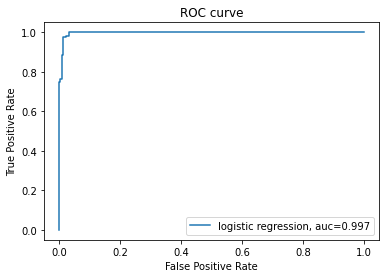

In [69]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)
auc = metrics.roc_auc_score(y_test, predictions)
plt.plot(fpr,tpr,label="logistic regression, auc=%.3f"%auc)
plt.legend(loc=4)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Logistic Regression can be interpreted as a neural network with just a single layer. It uses the Cross Entropy to measure the performance of the layer (i.e. of the "trained" weight **w**). In ML we call this the **Loss function**. 

What happens when you take the Means Squared Error (MSE) instead of the Cross Entropy? Does this also work? Implement MSE and try for yourself.

Answer: If we take MSE instead of the Cross Entropy then It will not converge as the cost function is not convex and there are a lot of local minima.




gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight shape 256
gradient shape 256 weight sh

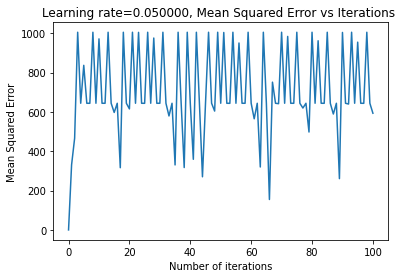

In [81]:
num_iter=100
w,b=weight_initiliazitation(X_train)
#lr_list=[0.00001,0.0001,0.001,0.01,0.1,0.2,0.3,0.4]
#optimum_learning_rate=find_optimum_lr_mse(lr_list,X_train,y_train,X_test,y_test,w,b)
model = LogisticRegression(w,b).fit_mse(X_train,y_train,0.05,num_iter)